In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para graficar fechas
import seaborn as sns
import math # Para logaritmos
import os # Para cambiar directorios para los que trabajen de forma local en sus computadoras
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter # Filtro HP
from datetime import datetime
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', '{:.2f}'.format)



Importamos los datos

In [597]:
df = pd.read_excel('deflactacion_corrientes.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.set_index('fecha',inplace=True)

df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
fecha,,,,,,,,,,,,,,
2017-01-01,5,18,414425.89,55223.97,93280.93,19161.33,31799.71,52424.65,16475.95,13889.58,53520.86,11313.45,27207.56,39662.07
2017-02-01,5,18,393554.10,52277.27,95111.70,18678.89,31539.13,51979.76,16524.55,12775.21,49428.09,10054.45,21156.32,33553.14
2017-03-01,5,18,400771.34,52853.43,101066.13,19780.98,32512.80,52554.65,17230.40,13257.76,51250.27,9989.44,21353.43,30834.41
2017-04-01,5,18,411524.24,50280.32,110553.62,21049.55,31650.97,54256.12,15848.45,13309.97,51006.93,12887.98,23611.24,29449.35
2017-05-01,5,18,390927.50,42314.30,100641.90,19761.43,29896.17,49624.11,14179.88,12517.99,48910.21,14040.95,30447.03,29814.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.48,73596.57,66509.41,12378.02,24954.74,39250.82,10924.85,6873.98,40024.13,10900.05,17093.07,33760.41
2024-01-01,5,18,282017.92,46319.15,52891.97,10320.21,23494.18,28671.61,10017.84,5261.15,34081.62,6414.87,12361.93,24635.88
2024-02-01,5,18,259887.04,40663.27,51263.34,9717.90,20869.63,28810.39,9996.01,4865.16,30093.04,4932.40,11456.42,22770.22


In [598]:
columna_objetivo = 'bebidas'

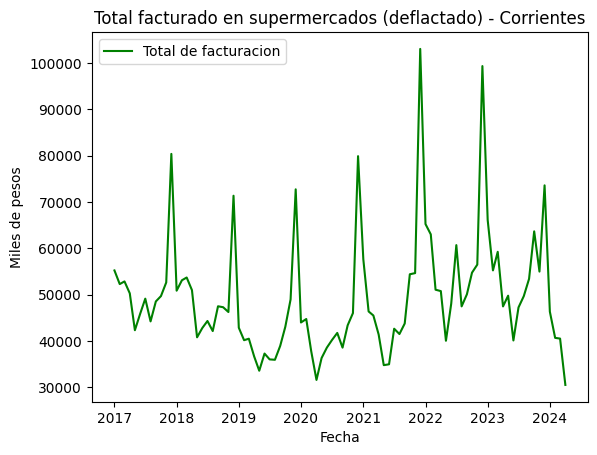

In [599]:
plt.plot(df[columna_objetivo],label='Total de facturacion', color = "green")
plt.title('Total facturado en supermercados (deflactado) - Corrientes')
plt.xlabel('Fecha')
plt.ylabel('Miles de pesos')
plt.legend()
plt.show()


Generamos una serie secuencial para añadir una tendencia, es un tipo de indice

In [600]:
df['tendencia'] = np.arange(1,len(df)+1)

Creamos un modelo lineal teniendo en cuenta solo esta variable "tendencia"

In [601]:
X = df['tendencia']
X = sm.add_constant(X)

Y = df[columna_objetivo]
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:                bebidas   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.931
Date:                Fri, 19 Jul 2024   Prob (F-statistic):              0.168
Time:                        23:07:55   Log-Likelihood:                -956.23
No. Observations:                  88   AIC:                             1916.
Df Residuals:                      86   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.61e+04   2756.906     16.723      0.0

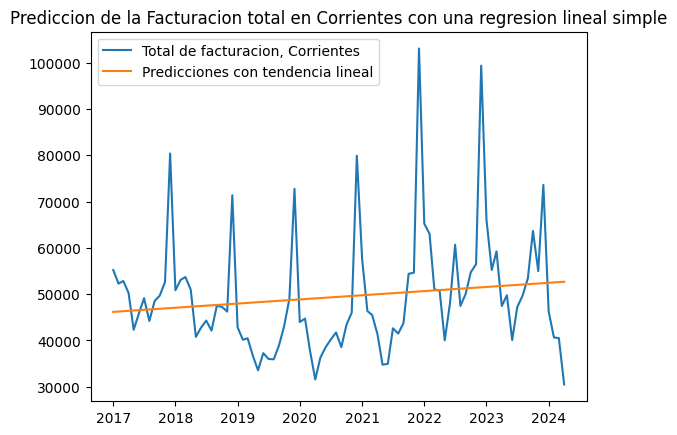

In [602]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal")
plt.title("Prediccion de la Facturacion total en Corrientes con una regresion lineal simple")
plt.legend()
plt.show()

Probando lo mismo, pero con una tendencia cuadratica

In [603]:
df['tend_cuadratica'] = df['tendencia'] ** 2
df['tend_cuadratica']

fecha
2017-01-01       1
2017-02-01       4
2017-03-01       9
2017-04-01      16
2017-05-01      25
              ... 
2023-12-01    7056
2024-01-01    7225
2024-02-01    7396
2024-03-01    7569
2024-04-01    7744
Name: tend_cuadratica, Length: 88, dtype: int64

In [604]:
X = df[['tendencia','tend_cuadratica']]
X = sm.add_constant(X)

Y = df[columna_objetivo]
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:                bebidas   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.727
Date:                Fri, 19 Jul 2024   Prob (F-statistic):              0.184
Time:                        23:07:56   Log-Likelihood:                -955.46
No. Observations:                  88   AIC:                             1917.
Df Residuals:                      85   BIC:                             1924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.998e+04   4182.713     

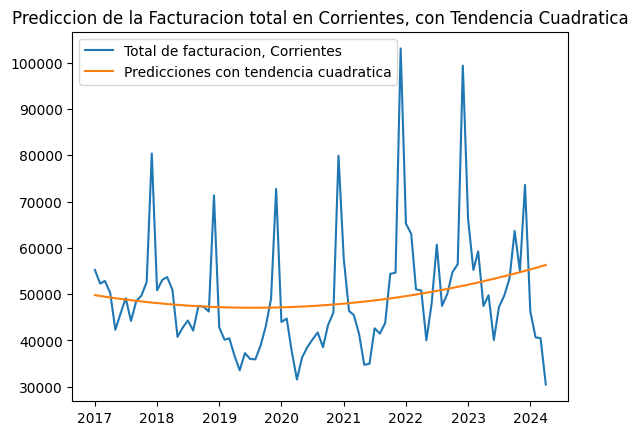

In [605]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia cuadratica")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia Cuadratica")
plt.legend()
plt.show()

<h3> Capturamos la estacionalidad </h3>
<p> Buscamos capturar la estacionalidad del conjunto de datos usando variables binarias para marcar mejores los meses </p>
<p> Para ello creamos una dummie binaria que marque los meses </p>

In [606]:
df['mes'] = df.index.month #--> 1. Tomamos los meses

#2. Lo que hace esto es: 
# Genera la dummie, tomando el DF como conjunto de datos, la columna 'meses' para generar la dummie
# y eliminamos el primer elemento para evitar la multicolinealidad. Por ultimo declaramos que sea numerica
# la variable binaria (trabajamos con 0 y 1).
df = pd.get_dummies(df,columns=['mes'], drop_first=True, dtype=int)
df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
fecha,,,,,,,,,,,,,,,,,,,,,
2017-01-01,5,18,414425.89,55223.97,93280.93,19161.33,31799.71,52424.65,16475.95,13889.58,...,0,0,0,0,0,0,0,0,0,0
2017-02-01,5,18,393554.10,52277.27,95111.70,18678.89,31539.13,51979.76,16524.55,12775.21,...,0,0,0,0,0,0,0,0,0,0
2017-03-01,5,18,400771.34,52853.43,101066.13,19780.98,32512.80,52554.65,17230.40,13257.76,...,1,0,0,0,0,0,0,0,0,0
2017-04-01,5,18,411524.24,50280.32,110553.62,21049.55,31650.97,54256.12,15848.45,13309.97,...,0,1,0,0,0,0,0,0,0,0
2017-05-01,5,18,390927.50,42314.30,100641.90,19761.43,29896.17,49624.11,14179.88,12517.99,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.48,73596.57,66509.41,12378.02,24954.74,39250.82,10924.85,6873.98,...,0,0,0,0,0,0,0,0,0,1
2024-01-01,5,18,282017.92,46319.15,52891.97,10320.21,23494.18,28671.61,10017.84,5261.15,...,0,0,0,0,0,0,0,0,0,0
2024-02-01,5,18,259887.04,40663.27,51263.34,9717.90,20869.63,28810.39,9996.01,4865.16,...,0,0,0,0,0,0,0,0,0,0


In [607]:
X = df[['tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df[columna_objetivo]

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bebidas   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     15.08
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.71e-15
Time:                        23:07:56   Log-Likelihood:                -903.19
No. Observations:                  88   AIC:                             1832.
Df Residuals:                      75   BIC:                             1865.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.118e+04   2984.385     17.149      0.000    4.52e+04    5.71e+04
tendencia     54.5988     31.626      1.726      0.088      -8.403     117.600
mes_2      -4137.2442   3757.054     -1.101      0.274   -1.16e+04    3347.192
mes_3      -5992.1524   3757.454     -1.595      0.115   -1.35e+04    1493.079
mes_4      -1.124e+04   3758.119     -2.991      0.004   -1.87e+04   -3753.327
mes_5      -1.377e+04   3889.297     -3.539      0.001   -2.15e+04   -6017.589
mes_6      -1.238e+04   3888.912     -3.184      0.002   -2.01e+04   -4634.837
mes_7      -7780.7485   3888.783     -2.001      0.049   -1.55e+04     -33.895
mes_8      -1.035e+04   3888.912     -2.660      0.010   -1.81e+04   -2598.317
mes_9      -7814.4710   3889.297     -2.009      0.048   -1.56e+04     -66.593
mes_10     -2804.8649   3889.940     -0.721      0.473   -1.06e+04    4944.293
mes_11     -2321.7042   3890.840     -0.597      0.552   -1.01e+04    5429.247
mes_12      2.911e+04   3891.997      7.481      0.000    2.14e+04    3.69e+04
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   0.547
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.731
Skew:                           0.279   Prob(JB):                        0.421
Kurtosis:                       2.598   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [608]:
#Generamos predicciones
predicciones = reg_tend_estac.predict(X)

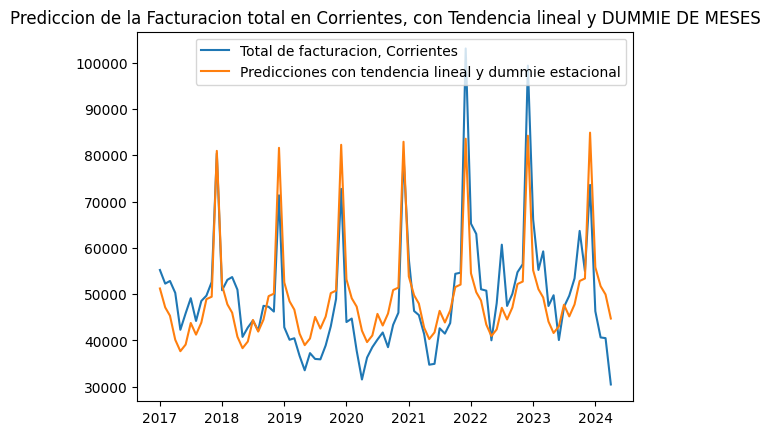

In [609]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h3> Inclusion de resagos (lags) </h3>


In [610]:
df['ventas_lag'] = df[columna_objetivo].shift(1)

In [611]:
X = df.dropna(subset=['ventas_lag'])[['ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df.dropna(subset=['ventas_lag'])[columna_objetivo]

reg_tend_estac_lag = sm.OLS(y,X).fit()
predicciones = reg_tend_estac_lag.predict(X)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bebidas   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     34.58
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           6.10e-26
Time:                        23:07:56   Log-Likelihood:                -861.11
No. Observations:                  87   AIC:                             1750.
Df Residuals:                      73   BIC:                             1785.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8672.5443   6997.256     -1.239      0.219   -2.26e+04    5272.967
ventas_lag     0.7424      0.083      8.931      0.000       0.577       0.908
tendencia      8.2645     23.197      0.356      0.723     -37.968      54.497
mes_2       1.802e+04   3638.062      4.952      0.000    1.08e+04    2.53e+04
mes_3       1.924e+04   3875.026      4.965      0.000    1.15e+04     2.7e+04
mes_4       1.537e+04   3986.621      3.856      0.000    7429.027    2.33e+04
mes_5       1.521e+04   4243.712      3.583      0.001    6747.458    2.37e+04
mes_6       1.998e+04   4534.406      4.406      0.000    1.09e+04     2.9e+04
mes_7       2.356e+04   4444.836      5.300      0.000    1.47e+04    3.24e+04
mes_8       1.758e+04   4155.728      4.232      0.000    9302.615    2.59e+04
mes_9       2.203e+04   4315.451      5.104      0.000    1.34e+04    3.06e+04
mes_10      2.516e+04   4158.357      6.051      0.000    1.69e+04    3.34e+04
mes_11      2.193e+04   3861.938      5.679      0.000    1.42e+04    2.96e+04
mes_12      5.302e+04   3834.992     13.824      0.000    4.54e+04    6.07e+04
==============================================================================
Omnibus:                        8.554   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.028
Skew:                           0.499   Prob(JB):                      0.00664
Kurtosis:                       4.330   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

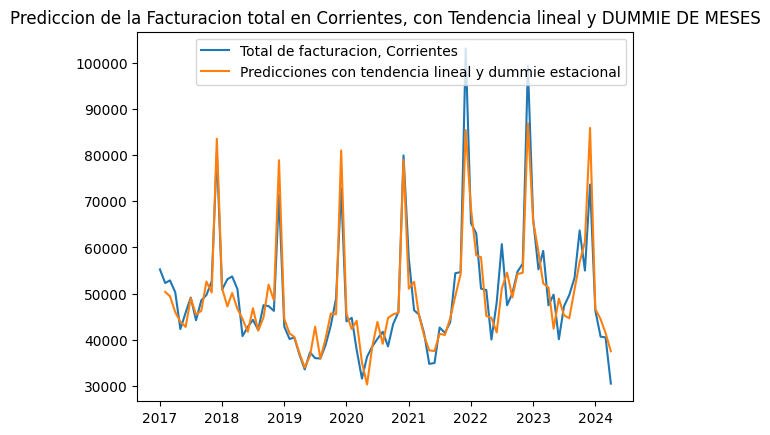

In [612]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h3> Influencia del COVID </h3>
<p> Agregamos una binaria para ver como afecto a las ventas el virus COVID. </p>
<p> Consideramos:</p>
<p> Fecha de inicio: 11 de Marzo 2020 - Declara la OMS</p>
<p> Fecha de "fin": Diciembre 2022 - Idea general</p>


In [613]:
df['covid'] = ((df.index >= datetime(2020,3,11)) & (df.index <= datetime(2022,12,30))).astype(int)

Creamos nuestras X e Y para el modelo, y dividimos los datos.

In [614]:
X = df.dropna(subset=['ventas_lag'])[['covid','ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
y = df.dropna(subset=['ventas_lag'])[columna_objetivo]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

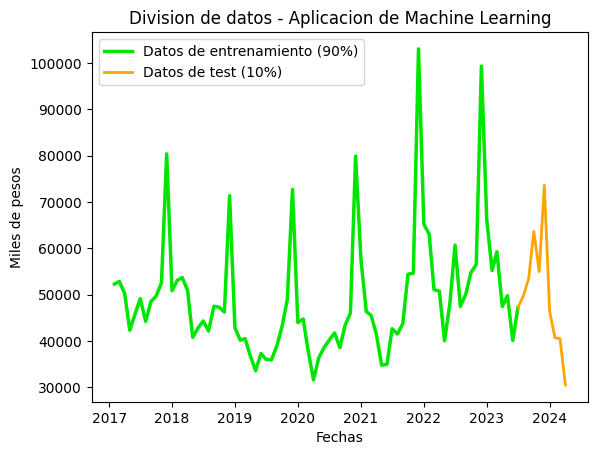

In [615]:
#Sacamos largo para determinar el 90 de los datos
largo = len(y)
porcentage_90 = int(largo*0.9)

plt.title("Division de datos - Aplicacion de Machine Learning")
plt.plot(y[:porcentage_90], label = "Datos de entrenamiento (90%)",color = (0.0, 0.9, 0.0),linewidth = 2.5)
plt.plot(y[porcentage_90 -1:],label = "Datos de test (10%)",color = "orange",linewidth = 2.0)
plt.xlabel('Fechas')
plt.ylabel('Miles de pesos')
plt.legend()
plt.show()

In [616]:

reg_tend_estac_lag = sm.OLS(y_train,X_train).fit()
predicciones = reg_tend_estac_lag.predict(X_test)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bebidas   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     32.58
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.68e-23
Time:                        23:07:57   Log-Likelihood:                -766.93
No. Observations:                  78   AIC:                             1564.
Df Residuals:                      63   BIC:                             1599.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6986.0346   7463.368     -0.936      0.353   -2.19e+04    7928.317
covid       1472.1122   1461.892      1.007      0.318   -1449.245    4393.469
ventas_lag     0.7160      0.089      8.068      0.000       0.539       0.893
tendencia     10.8015     33.344      0.324      0.747     -55.831      77.434
mes_2       1.779e+04   3821.690      4.656      0.000    1.02e+04    2.54e+04
mes_3       1.851e+04   4070.127      4.547      0.000    1.04e+04    2.66e+04
mes_4       1.524e+04   4197.320      3.631      0.001    6851.610    2.36e+04
mes_5       1.395e+04   4510.574      3.092      0.003    4935.199     2.3e+04
mes_6        1.86e+04   4838.618      3.844      0.000    8932.681    2.83e+04
mes_7       2.222e+04   4743.104      4.684      0.000    1.27e+04    3.17e+04
mes_8       1.543e+04   4461.999      3.457      0.001    6510.621    2.43e+04
mes_9        2.02e+04   4696.424      4.301      0.000    1.08e+04    2.96e+04
mes_10      2.267e+04   4538.311      4.996      0.000    1.36e+04    3.17e+04
mes_11      2.173e+04   4265.419      5.095      0.000    1.32e+04    3.03e+04
mes_12      5.387e+04   4138.891     13.015      0.000    4.56e+04    6.21e+04
==============================================================================
Omnibus:                        3.191   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.438
Skew:                           0.324   Prob(JB):                        0.296
Kurtosis:                       3.574   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

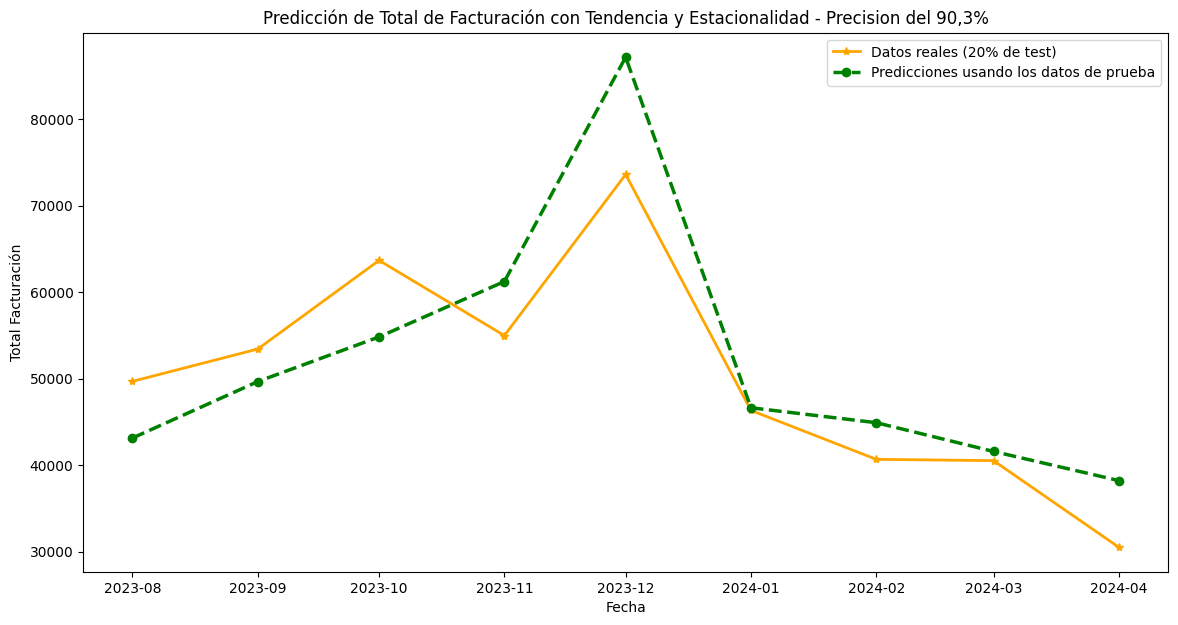

In [617]:
# Graficar los resultados del modelo inicial
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label="Datos reales (20% de test)", color='orange', marker = "*", linewidth = 2.0)
plt.plot(X_test.index, predicciones, label='Predicciones usando los datos de prueba', color='green', linestyle='--',linewidth = 2.5, marker = "o")
plt.title('Predicción de Total de Facturación con Tendencia y Estacionalidad - Precision del 90,3%')
plt.xlabel('Fecha')
plt.ylabel('Total Facturación')
plt.legend()
plt.show()

<h3> Entrenamiento del modelo usando todos los datos </h3>
Como tal, el modelo hasta el momento es puramente descriptivo, ya que nuestra idea es generar una prediccino a futuro, de forma que predecir un valor que el indec ya presento oficialmente, no es realmente util.

In [618]:
# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train, X_test])
y_train_full = pd.concat([y_train, y_test])

# Reentrenar el modelo de regresión lineal con todos los datos
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit()
print(reg_tend_estac_lag_full.summary())
y_train_full

                            OLS Regression Results                            
Dep. Variable:                bebidas   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     32.95
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.12e-25
Time:                        23:07:57   Log-Likelihood:                -859.63
No. Observations:                  87   AIC:                             1749.
Df Residuals:                      72   BIC:                             1786.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8706.7757   6926.774     -1.257      0.2

fecha
2017-02-01   52277.27
2017-03-01   52853.43
2017-04-01   50280.32
2017-05-01   42314.30
2017-06-01   45870.62
               ...   
2023-12-01   73596.57
2024-01-01   46319.15
2024-02-01   40663.27
2024-03-01   40508.56
2024-04-01   30501.96
Name: bebidas, Length: 87, dtype: float64

IMPORTANTE: Generaremos los datos necesarios para hacer la prediccion de mayo. Lo validaremos cuando salga el dato real

In [619]:
#=============== MAYO ===============#
#Fila para predecir MAYO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 1,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_mayo = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_mayo])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== JUNIO ===============#

#FILA PARA PREDECIR JUNIO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 1,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_junio = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_junio])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== JULIO ===============#

#FILA PARA PREDECIR JULIO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 1,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_julio = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_julio])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== AGOSTO ===============#

#FILA PARA PREDECIR AGOSTO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 1,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_agosto = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_agosto])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== SEPTIEMBRE ===============#


#FILA PARA PREDECIR SEPTIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 1,'mes_10': 0,'mes_11': 0,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_septiembre = reg_tend_estac_lag_full.predict(nueva_fila_df)


# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_septiembre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== OCTUBRE ===============#

#FILA PARA PREDECIR OCTUBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 1,'mes_11': 0,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_octubre = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_octubre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== NOVIEMBRE ===============#

#FILA PARA PREDECIR NOVIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 1,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_noviembre = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_noviembre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== DICIEMBRE ===============#

#FILA PARA PREDECIR DICIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 1}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

prediccion_diciembre = reg_tend_estac_lag_full.predict(nueva_fila_df)


# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_noviembre])

print(prediccion_mayo)
print(prediccion_junio)
print(prediccion_julio)
print(prediccion_agosto)
print(prediccion_septiembre)
print(prediccion_octubre)
print(prediccion_noviembre)
print(prediccion_diciembre)


2024-05-01   28413.29
dtype: float64
2024-05-01   31649.11
dtype: float64
2024-05-01   37642.14
dtype: float64
2024-05-01   36126.78
dtype: float64
2024-05-01   39452.26
dtype: float64
2024-05-01   45066.87
dtype: float64
2024-05-01   46014.05
dtype: float64
2024-05-01   77809.37
dtype: float64


Vamos a incluir los datos del IPC y ver como influyen en la regresion

In [620]:
datos_ipc = pd.read_excel('ipc_segmentacion_nea.xlsx')

#Rescatamos la fecha maxima y minima del supermercado para recortar los datos del IPC
fecha_min = min(df.index)
fecha_max = max(df.index)

valores_para_super = datos_ipc[(datos_ipc['id_categoria'] == 1) & (datos_ipc['id_division'] == 1) & (datos_ipc['id_subdivision'] == 1)]
valores_para_super = valores_para_super.set_index('fecha')
valores_para_super = valores_para_super[(valores_para_super.index >= fecha_min) & (valores_para_super.index <= fecha_max)]
valores_para_super

,Unnamed: 0,id_region,id_categoria,id_division,id_subdivision,valor
fecha,,,,,,
2017-01-01,1,5,1,1,1,101.67
2017-02-01,2,5,1,1,1,103.46
2017-03-01,3,5,1,1,1,105.99
2017-04-01,4,5,1,1,1,108.35
2017-05-01,5,5,1,1,1,110.43
...,...,...,...,...,...,...
2023-12-01,84,5,1,1,1,3795.53
2024-01-01,85,5,1,1,1,4535.80
2024-02-01,86,5,1,1,1,5030.02


Anexamos la columna valor al conjunto de datos del supermercado

In [621]:
df['ipc_general'] = valores_para_super['valor']

Creamos de nuevo el modelo para probar su eficiencia

In [622]:
X = df.dropna(subset=['ventas_lag'])[['ipc_general','covid','ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df.dropna(subset=['ventas_lag'])['total_facturacion']
reg_tend_estac_lag = sm.OLS(y,X).fit()
predicciones = reg_tend_estac_lag.predict(X)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     38.09
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           6.44e-28
Time:                        23:07:58   Log-Likelihood:                -971.27
No. Observations:                  87   AIC:                             1975.
Df Residuals:                      71   BIC:                             2014.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.383e+05   2.55e+04      9.344      0.000    1.87e+05    2.89e+05
ipc_general     4.1450      3.283      1.263      0.211      -2.400      10.691
covid        -1.17e+04   5761.827     -2.030      0.046   -2.32e+04    -207.994
ventas_lag      2.0804      0.309      6.726      0.000       1.464       2.697
tendencia   -1655.6173    167.400     -9.890      0.000   -1989.403   -1321.831
mes_2        4.368e+04   1.32e+04      3.304      0.001    1.73e+04       7e+04
mes_3        7.306e+04   1.41e+04      5.185      0.000     4.5e+04    1.01e+05
mes_4        5.517e+04   1.44e+04      3.821      0.000    2.64e+04     8.4e+04
mes_5        7.461e+04   1.56e+04      4.780      0.000    4.35e+04    1.06e+05
mes_6        8.658e+04   1.67e+04      5.180      0.000    5.33e+04     1.2e+05
mes_7        9.496e+04   1.64e+04      5.796      0.000    6.23e+04    1.28e+05
mes_8        7.628e+04   1.53e+04      4.992      0.000    4.58e+04    1.07e+05
mes_9        7.584e+04   1.59e+04      4.778      0.000    4.42e+04    1.07e+05
mes_10       1.015e+05   1.53e+04      6.646      0.000    7.11e+04    1.32e+05
mes_11       9.152e+04   1.41e+04      6.471      0.000    6.33e+04     1.2e+05
mes_12       1.647e+05    1.4e+04     11.772      0.000    1.37e+05    1.93e+05
==============================================================================
Omnibus:                        1.203   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.128
Skew:                           0.272   Prob(JB):                        0.569
Kurtosis:                       2.875   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

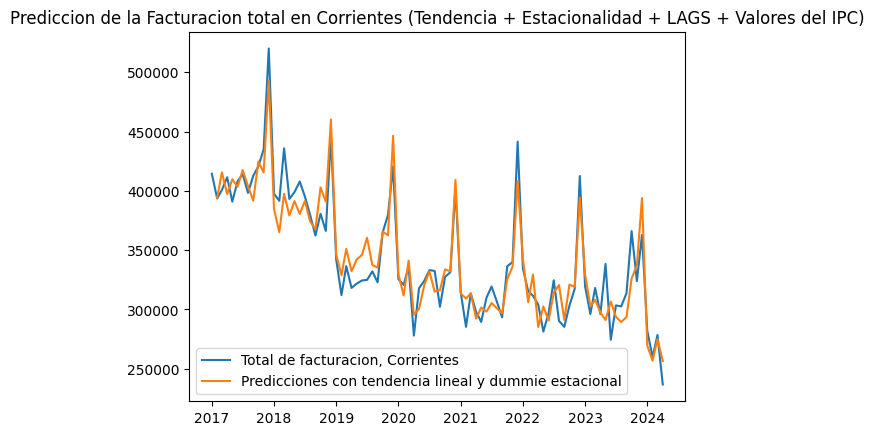

In [623]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes (Tendencia + Estacionalidad + LAGS + Valores del IPC)")
plt.legend()
plt.show()

Viendo el resultado, vemos que el $R²$ mejoro un 0.01. Ademas de incluir un P valor con una prob. de rechazo muy grande, por ende no lo consideramos relevante